In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.neighbors import NearestNeighbors

In [229]:
train = pd.read_csv("train.csv")

In [230]:
test = pd.read_csv("test.csv")

In [231]:
train.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [232]:
test.head(10)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886


# EDA

In [233]:
#Dropping Descript and Resolution cloumns from Training Data as it is not present in Test Data

In [234]:
train.drop(["Descript", "Resolution"], axis=1, inplace=True)

In [235]:
train

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [236]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,878049.0,-122.422616,0.030354,-122.513642,-122.432952,-122.416420,-122.406959,-120.5
Y,878049.0,37.771020,0.456893,37.707879,37.752427,37.775421,37.784369,90.0


In [237]:
test.drop(["Id"], axis=1, inplace=True)

In [238]:
test

,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
...,...,...,...,...,...,...
884257,2003-01-01 00:01:00,Wednesday,MISSION,2600 Block of BRYANT ST,-122.408983,37.751987
884258,2003-01-01 00:01:00,Wednesday,NORTHERN,1900 Block of WASHINGTON ST,-122.425342,37.792681
884259,2003-01-01 00:01:00,Wednesday,INGLESIDE,5500 Block of MISSION ST,-122.445418,37.712075
884260,2003-01-01 00:01:00,Wednesday,BAYVIEW,1500 Block of HUDSON AV,-122.387394,37.739479


In [239]:
train["Dates"] = pd.to_datetime(train["Dates"], format="%Y-%m-%d %H:%M:%S")
train["Hour"] = train["Dates"].map(lambda x: x.hour)
train["Month"] = train["Dates"].map(lambda x: x.month)
train["Year"] = train["Dates"].map(lambda x: x.year)

In [240]:
train["Day"] = train["Dates"].map(lambda x: x.day)

In [241]:
train["Minute"] = train["Dates"].map(lambda x: x.minute)

In [242]:
train

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13,33
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13,30
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13,30
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,0,1,2003,6,15
878045,2003-01-06 00:01:00,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,0,1,2003,6,1
878046,2003-01-06 00:01:00,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,0,1,2003,6,1
878047,2003-01-06 00:01:00,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,0,1,2003,6,1


In [243]:
train.drop(["Dates"], axis=1, inplace=True)

In [244]:
train

,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13,33
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13,30
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13,30
...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,Monday,TARAVAL,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,0,1,2003,6,15
878045,LARCENY/THEFT,Monday,INGLESIDE,600 Block of EDNA ST,-122.447364,37.731948,0,1,2003,6,1
878046,LARCENY/THEFT,Monday,SOUTHERN,5TH ST / FOLSOM ST,-122.403390,37.780266,0,1,2003,6,1
878047,VANDALISM,Monday,SOUTHERN,TOWNSEND ST / 2ND ST,-122.390531,37.780607,0,1,2003,6,1


## Categories of crimes which are in SF between 2003 - 2015?

In [245]:
train['Category'].isnull().values.any()

False

### There are no null values in the data set

In [246]:
## Count number of observations for each crime
train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

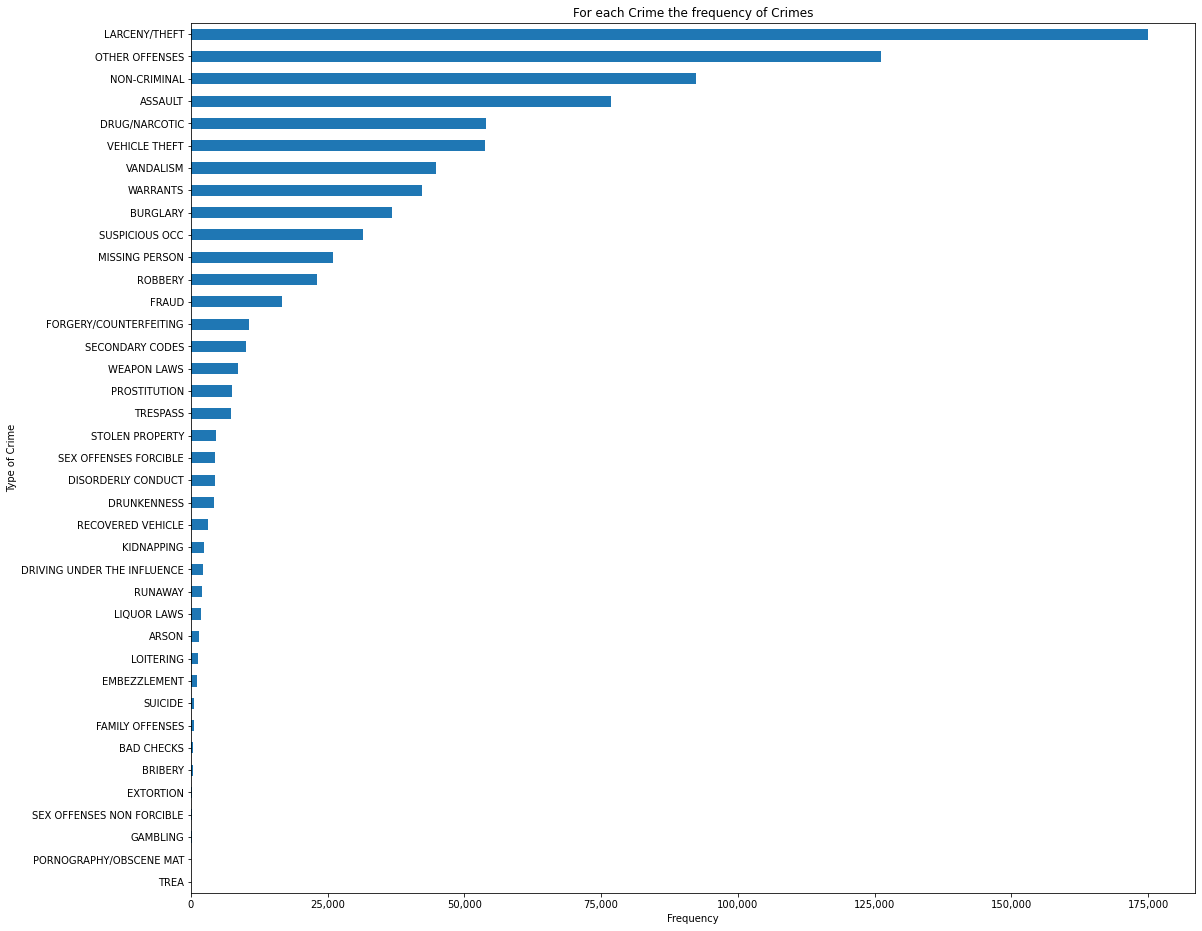

In [247]:
crime_type_df = train['Category'].value_counts(ascending=True)

fig=plt.figure(figsize=(18, 16))
plt.title("For each Crime the frequency of Crimes")
plt.xlabel("Frequency")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [248]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  object 
 1   DayOfWeek   878049 non-null  object 
 2   PdDistrict  878049 non-null  object 
 3   Address     878049 non-null  object 
 4   X           878049 non-null  float64
 5   Y           878049 non-null  float64
 6   Hour        878049 non-null  int64  
 7   Month       878049 non-null  int64  
 8   Year        878049 non-null  int64  
 9   Day         878049 non-null  int64  
 10  Minute      878049 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 73.7+ MB


### Now we can find the bar graphs of frequency of crimes 

Text(0.5, 1.0, 'Amount of crime in a minute')

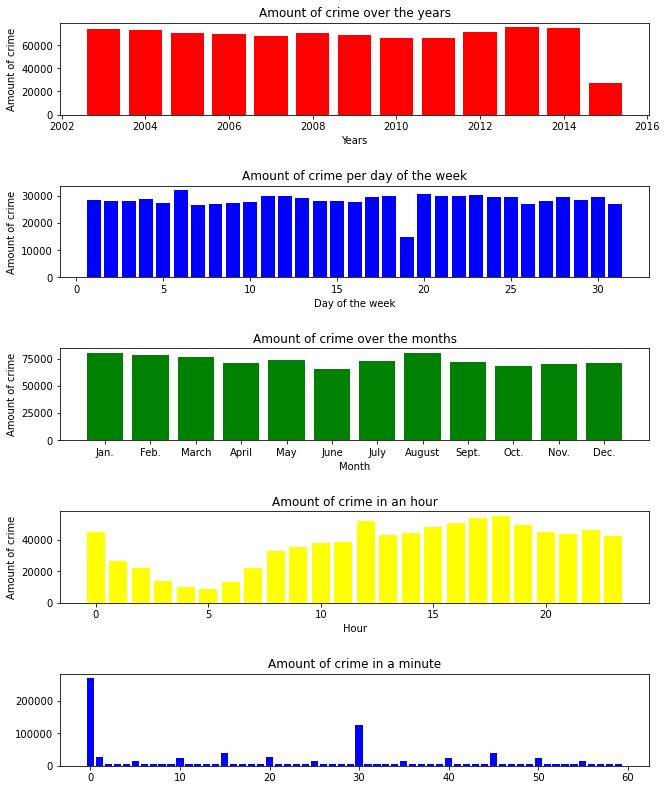

In [249]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(10, 12))
fig.tight_layout(pad=5.0)

count = Counter(train['Year'])
ax1.bar(count.keys(), count.values(), color='red')
ax1.set_title('Amount of crime over the years')
ax1.set_ylabel('Amount of crime')
ax1.set_xlabel('Years')

count = Counter(train['Day'])
ax2.bar(np.unique(train['Day']), count.values(), color='blue')
ax2.set_title('Amount of crime per day of the week')
ax2.set_ylabel('Amount of crime')
ax2.set_xlabel('Day of the week')

count = Counter(train['Month'])
ax3.bar(['Jan.', 'Feb.', 'March', 'April', 'May', 'June', 'July', 'August','Sept.','Oct.','Nov.','Dec.'],count.values(),color='green')
ax3.set_title('Amount of crime over the months')
ax3.set_ylabel('Amount of crime')
ax3.set_xlabel('Month')

count = Counter(train['Hour'])
ax4.bar(count.keys(), count.values(), color='yellow')
ax4.set_title('Amount of crime in an hour')
ax4.set_ylabel('Amount of crime')
ax4.set_xlabel('Hour')

count = Counter(train['Minute'])
ax5.bar(count.keys(), count.values(), color='blue')
ax5.set_title('Amount of crime in a minute')


In [250]:
plt.show()

In [251]:
# crime_per_month = pd.to_datetime(df['Dates'], format="%Y-%m-%d %H:%M:%S").dt.month.value_counts().sort_index()
crime_per_month = train['Month'].value_counts().sort_index()
crime_per_month

1     73536
2     70813
3     76320
4     78096
5     79644
6     70892
7     69971
8     68540
9     71982
10    80274
11    72975
12    65006
Name: Month, dtype: int64

In [252]:
for i in train.columns:
    if train[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(train[i].value_counts())
        print()
        print()

Category

the values are:
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                 

## Label Encoding

In [253]:
# converting type of columns to 'category'
train['PdDistrict'] = train['PdDistrict'].astype('category')
# Assigning numerical values and storing in another colum
train['pd district'] = train['PdDistrict'].cat.codes
train.head(10)

,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute,pd district
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53,4
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53,4
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13,33,4
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13,30,4
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13,30,5
5,LARCENY/THEFT,Wednesday,INGLESIDE,0 Block of TEDDY AV,-122.403252,37.713431,23,5,2015,13,30,2
6,VEHICLE THEFT,Wednesday,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,23,5,2015,13,30,2
7,VEHICLE THEFT,Wednesday,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,23,5,2015,13,30,0
8,LARCENY/THEFT,Wednesday,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601,23,5,2015,13,0,6
9,LARCENY/THEFT,Wednesday,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,23,5,2015,13,0,1


In [254]:
# converting type of columns to 'category'
train['Address'] = train['Address'].astype('category')
# Assigning numerical values and storing in another column
train['add'] = train['Address'].cat.codes
train.head(10)

,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute,pd district,add
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53,4,19790
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53,4,19790
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13,33,4,22697
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13,30,4,4266
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13,30,5,1843
5,LARCENY/THEFT,Wednesday,INGLESIDE,0 Block of TEDDY AV,-122.403252,37.713431,23,5,2015,13,30,2,1505
6,VEHICLE THEFT,Wednesday,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,23,5,2015,13,30,2,13322
7,VEHICLE THEFT,Wednesday,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,23,5,2015,13,30,0,18054
8,LARCENY/THEFT,Wednesday,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601,23,5,2015,13,0,6,11384
9,LARCENY/THEFT,Wednesday,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,23,5,2015,13,0,1,17658


In [255]:
# converting type of columns to 'category'
train['DayOfWeek'] = train['DayOfWeek'].astype('category')
# Assigning numerical values and storing in another colum
train['day of week'] = train['DayOfWeek'].cat.codes
train.head(10)

,Category,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute,pd district,add,day of week
0,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53,4,19790,6
1,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,23,5,2015,13,53,4,19790,6
2,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,23,5,2015,13,33,4,22697,6
3,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,23,5,2015,13,30,4,4266,6
4,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,23,5,2015,13,30,5,1843,6
5,LARCENY/THEFT,Wednesday,INGLESIDE,0 Block of TEDDY AV,-122.403252,37.713431,23,5,2015,13,30,2,1505,6
6,VEHICLE THEFT,Wednesday,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,23,5,2015,13,30,2,13322,6
7,VEHICLE THEFT,Wednesday,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,23,5,2015,13,30,0,18054,6
8,LARCENY/THEFT,Wednesday,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601,23,5,2015,13,0,6,11384,6
9,LARCENY/THEFT,Wednesday,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,23,5,2015,13,0,1,17658,6


In [256]:
train.drop(["DayOfWeek","PdDistrict","Address","X","Y"], axis=1, inplace=True)

In [257]:
train

,Category,Hour,Month,Year,Day,Minute,pd district,add,day of week
0,WARRANTS,23,5,2015,13,53,4,19790,6
1,OTHER OFFENSES,23,5,2015,13,53,4,19790,6
2,OTHER OFFENSES,23,5,2015,13,33,4,22697,6
3,LARCENY/THEFT,23,5,2015,13,30,4,4266,6
4,LARCENY/THEFT,23,5,2015,13,30,5,1843,6
...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,0,1,2003,6,15,8,15816,1
878045,LARCENY/THEFT,0,1,2003,6,1,2,11491,1
878046,LARCENY/THEFT,0,1,2003,6,1,7,11315,1
878047,VANDALISM,0,1,2003,6,1,7,22308,1


### KNN Model

In [ ]:
##Now we have a Categorical value

In [258]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Category']= le.fit_transform(train['Category'])
train.head(10)

,Category,Hour,Month,Year,Day,Minute,pd district,add,day of week
0,37,23,5,2015,13,53,4,19790,6
1,21,23,5,2015,13,53,4,19790,6
2,21,23,5,2015,13,33,4,22697,6
3,16,23,5,2015,13,30,4,4266,6
4,16,23,5,2015,13,30,5,1843,6
5,16,23,5,2015,13,30,2,1505,6
6,36,23,5,2015,13,30,2,13322,6
7,36,23,5,2015,13,30,0,18054,6
8,16,23,5,2015,13,0,6,11384,6
9,16,23,5,2015,13,0,1,17658,6


In [263]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = train.loc[:,train.columns != 'Category'], train.loc[:,'Category']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction = ",prediction)

Prediction =  [37 37 21 ... 16 35 12]


In [264]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = train.loc[:,train.columns != 'Category'], train.loc[:,'Category']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=1) accuracy is:  0.22789894273294992


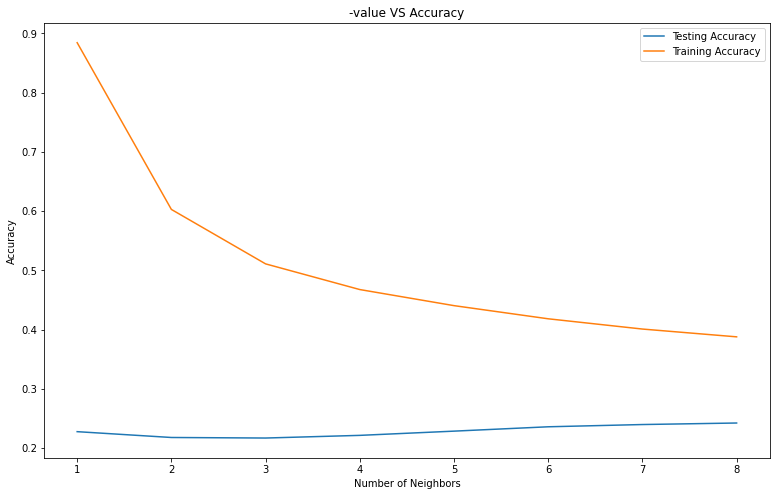

Best accuracy is 0.24248808913691325 with K = 8


In [265]:
k_values = np.arange(1,9)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 9(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

## Cross Validation

In [266]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=8)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.22176414 0.21909914 0.22648482 0.22161039 0.20882757]
cv_scores mean:0.21955721066860176


## Hypertuning model parameters using GridSearchCV

In [267]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 9)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=15)
#fit model to data
knn_gscv.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=15, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [268]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 8}

In [269]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.22052641869757098

In [ ]:
#create a new KNN model wth the obtained values

In [270]:
knn_cv = KNeighborsClassifier(n_neighbors=8)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=15)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=15.
  warnings.warn(("The least populated class in y has only %d"


[0.21805012 0.21849429 0.2145139  0.21174642 0.22004886 0.22225259
 0.22459299 0.2253959  0.22823172 0.22459683 0.22370849 0.22560476
 0.21687509 0.21885677 0.21492757]
cv_scores mean:0.22052641869757098


## For Test 

In [274]:
test["Dates"] = pd.to_datetime(test["Dates"], format="%Y-%m-%d %H:%M:%S")
test["Hour"] = test["Dates"].map(lambda x: x.hour)
test["Month"] = test["Dates"].map(lambda x: x.month)
test["Year"] = test["Dates"].map(lambda x: x.year)
test["Day"] = test["Dates"].map(lambda x: x.day)
test["Minute"] = test["Dates"].map(lambda x: x.minute)

In [275]:
# converting type of columns to 'category'
test['PdDistrict'] = test['PdDistrict'].astype('category')
# Assigning numerical values and storing in another colum
test['pd district'] = test['PdDistrict'].cat.codes
test.head(10)

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute,pd district
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,23,5,2015,10,59,0
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,23,5,2015,10,51,0
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,23,5,2015,10,50,4
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2
5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172,23,5,2015,10,40,8
6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,23,5,2015,10,30,2
7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,23,5,2015,10,30,2
8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165,23,5,2015,10,10,3
9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886,23,5,2015,10,10,1


In [276]:
# converting type of columns to 'category'
test['Address'] = test['Address'].astype('category')
# Assigning numerical values and storing in another colum
test['add'] = test['Address'].cat.codes
test.head(10)

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute,pd district,add
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,23,5,2015,10,59,0,6407
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,23,5,2015,10,51,0,9744
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,23,5,2015,10,50,4,6336
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2,10633
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2,10633
5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172,23,5,2015,10,40,8,13799
6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,23,5,2015,10,30,2,1890
7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,23,5,2015,10,30,2,5611
8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165,23,5,2015,10,10,3,8090
9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886,23,5,2015,10,10,1,22053


In [277]:
# converting type of columns to 'category'
test['DayOfWeek'] = test['DayOfWeek'].astype('category')
# Assigning numerical values and storing in another colum
test['day of week'] = test['DayOfWeek'].cat.codes
test.head(10)

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute,pd district,add,day of week
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,23,5,2015,10,59,0,6407,3
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,23,5,2015,10,51,0,9744,3
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,23,5,2015,10,50,4,6336,3
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2,10633,3
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2,10633,3
5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172,23,5,2015,10,40,8,13799,3
6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,23,5,2015,10,30,2,1890,3
7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,23,5,2015,10,30,2,5611,3
8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165,23,5,2015,10,10,3,8090,3
9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886,23,5,2015,10,10,1,22053,3


In [278]:
# converting type of columns to 'category'
test['DayOfWeek'] = test['DayOfWeek'].astype('category')
# Assigning numerical values and storing in another colum
test['day of week'] = test['DayOfWeek'].cat.codes
test.head(10)

,Dates,DayOfWeek,PdDistrict,Address,X,Y,Hour,Month,Year,Day,Minute,pd district,add,day of week
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,23,5,2015,10,59,0,6407,3
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,23,5,2015,10,51,0,9744,3
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,23,5,2015,10,50,4,6336,3
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2,10633,3
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,23,5,2015,10,45,2,10633,3
5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172,23,5,2015,10,40,8,13799,3
6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,23,5,2015,10,30,2,1890,3
7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,23,5,2015,10,30,2,5611,3
8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165,23,5,2015,10,10,3,8090,3
9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886,23,5,2015,10,10,1,22053,3


## Now a model for n neighbor with optimized k = 8 from Cross Validation

In [271]:
knn = KNeighborsClassifier(n_neighbors = 8)

In [272]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [273]:
knn.score(x_test,y_test)

0.24248808913691325

### Now using KNN with K = 8 the score is highest till now. The best accuracy is 0.24248808913691325 with K = 8

In [282]:
test.drop(["DayOfWeek","PdDistrict","Address","X","Y"], axis=1, inplace=True)

## Decision Tree

In [289]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

In [286]:
clf = DecisionTreeClassifier( max_leaf_nodes = 3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [287]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.22131617409790635

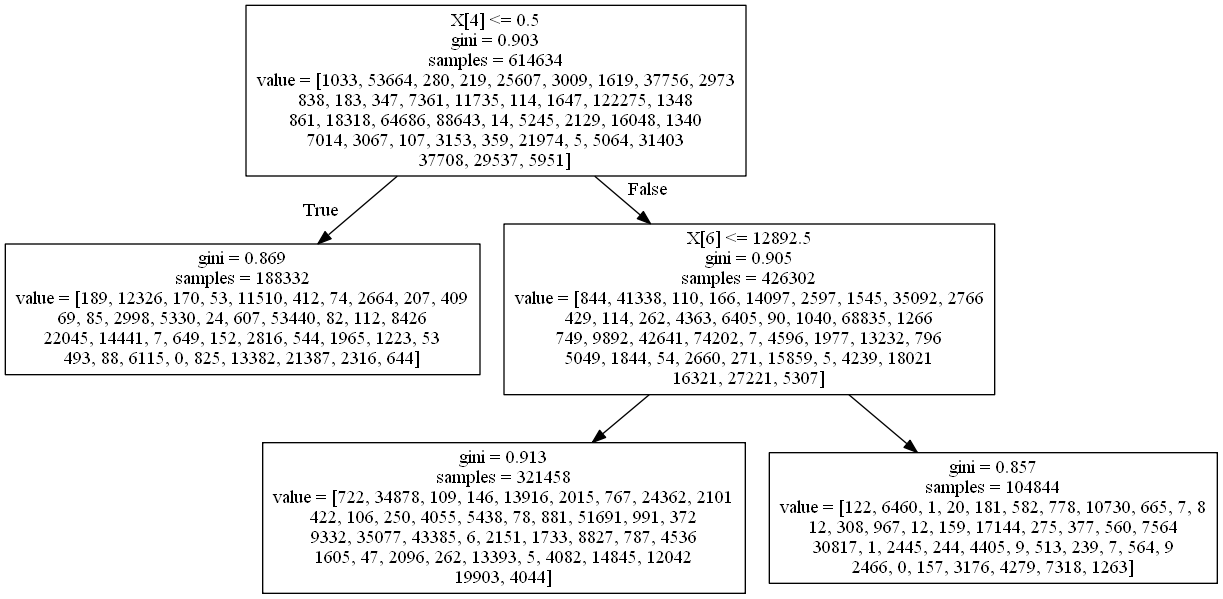

In [292]:
dot_data = export_graphviz(clf, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Now further splitting the data and then applying the Decision Tree Classifier

In [293]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, stratify=y)

In [296]:
dtc = DecisionTreeClassifier() # A Simple Classifier
dtc.fit(x_train, y_train) # training

DecisionTreeClassifier()

In [297]:
y_pred = dtc.predict(x_test)
accuracy_score(y_test, y_pred)

0.22627792646584288

## Application of Grid Search CV and Cross Validation

In [299]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 
              'max_depth': [3,5,7,20, 30]}

gs_inst = GridSearchCV(dtc,param_grid=param_grid,cv=5)
gs_inst.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20, 30]})

In [300]:
y_pred_gs = gs_inst.predict(x_test)
accuracy_score(y_test, y_pred_gs)

0.2508209479338686

In [301]:
gs_inst.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [302]:
## Here we can see that for 'criterion'- 'gini' and 'max_depth' 7 we are getting highest score which is 0.253020496925652 

for i, j in zip(gs_inst.cv_results_['mean_test_score'],gs_inst.cv_results_['params']):
    print(i, j)

0.22818945869013954 {'criterion': 'gini', 'max_depth': 3}
0.23435735978741876 {'criterion': 'gini', 'max_depth': 5}
0.253020496925652 {'criterion': 'gini', 'max_depth': 7}
0.24180406515146036 {'criterion': 'gini', 'max_depth': 20}
0.21539485159287874 {'criterion': 'gini', 'max_depth': 30}
0.22859945887511696 {'criterion': 'entropy', 'max_depth': 3}
0.23549300318973296 {'criterion': 'entropy', 'max_depth': 5}
0.2507378380040419 {'criterion': 'entropy', 'max_depth': 7}
0.23066735814909278 {'criterion': 'entropy', 'max_depth': 20}
0.2114494177455551 {'criterion': 'entropy', 'max_depth': 30}


## Now searching in the range from 2 to 25 for Maximum Depth

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


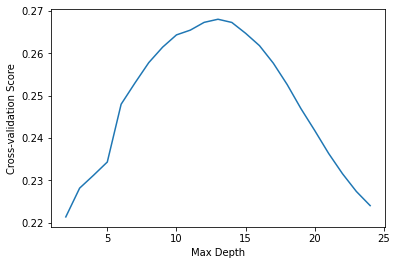

In [304]:
dtc = DecisionTreeClassifier()
max_depths = range(2,25)
param_grid = {'max_depth' : max_depths}
gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(x_train, y_train)
plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score");

In [305]:
# As we can see that the best naximum depth value is 13 and then again it is stepping down
gs_inst.best_params_

{'max_depth': 13}

In [306]:
gs_inst.best_estimator_

DecisionTreeClassifier(max_depth=13)

## Now plotting the model again for optimal maximum depth = 13 

In [307]:
obj = gs_inst.best_estimator_
obj.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=13)

In [314]:
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=13).fit(x_train, y_train)
y_pred = clf3.predict(x_test)
accuracy_score(y_test, y_pred)

0.2687128675284247

In [315]:
y_train

810616     7
636364     4
561410     5
652925     7
178424    35
          ..
847453    16
497953    35
436464     1
389501    35
25497     21
Name: Category, Length: 614634, dtype: int32

In [316]:
x_train

,Hour,Month,Year,Day,Minute,pd district,add,day of week
810616,2,11,2003,26,22,9,8464,6
636364,11,5,2006,4,0,9,5884,4
561410,10,6,2007,12,45,3,4990,5
652925,18,2,2006,8,20,3,7393,6
178424,22,12,2012,29,30,7,12308,2
...,...,...,...,...,...,...,...,...
847453,11,5,2003,29,30,7,9886,4
497953,16,5,2008,4,10,7,12904,3
436464,20,3,2009,20,0,0,7583,0
389501,21,11,2009,23,0,2,1821,1


## Till now this score with 0.2687660156027561 is the best score and we are selecting this model

### Confusion Matrix 

In [310]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

[[  27   67    0 ...   12    9    1]
 [  21 9342    1 ...  518  339   40]
 [   0   11    6 ...    6    1    0]
 ...
 [   5 1462    0 ... 4048   68   14]
 [   9 1675    2 ...  212 1163   36]
 [   2  498    0 ...   52   76  134]]


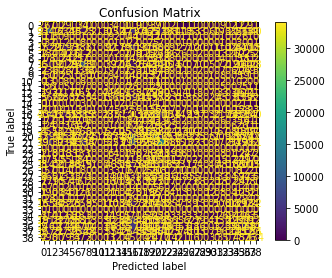

In [311]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, x_test, y_test)
cmap=plt.cm.Blues
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

[[   0   84    0 ...   22    2    0]
 [   1 3034    0 ...  856   75    9]
 [   0    1    0 ...    7    0    0]
 ...
 [   0  637    0 ... 3257   21    3]
 [   0  940    0 ...  127   80    6]
 [   0  334    0 ...   59   13   10]]


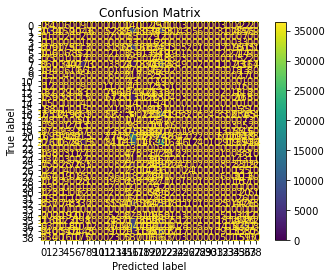

In [331]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf3, x_test, y_test)
cmap=plt.cm.Blues
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

## Application of selected Model on Test Data

In [ ]:
#test.drop(["Dates"], axis=1, inplace=True)

In [321]:
test_pred=clf3.predict(test)
print(le.inverse_transform(test_pred)[:10])

['LARCENY/THEFT' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT'
 'VEHICLE THEFT' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VEHICLE THEFT' 'ASSAULT'
 'OTHER OFFENSES']


In [322]:
test_new = pd.read_csv("test.csv")

In [323]:
final_predict = le.inverse_transform(test_pred)

In [324]:
test_new["Predicted Crime Category"] = final_predict

In [326]:
test_new.head(10)

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Predicted Crime Category
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,LARCENY/THEFT
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,OTHER OFFENSES
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,LARCENY/THEFT
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,VEHICLE THEFT
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,VEHICLE THEFT
5,5,2015-05-10 23:40:00,Sunday,TARAVAL,BROAD ST / CAPITOL AV,-122.459024,37.713172,LARCENY/THEFT
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,VEHICLE THEFT
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,VEHICLE THEFT
8,8,2015-05-10 23:10:00,Sunday,MISSION,2900 Block of 16TH ST,-122.418700,37.765165,ASSAULT
9,9,2015-05-10 23:10:00,Sunday,CENTRAL,TAYLOR ST / GREEN ST,-122.413935,37.798886,OTHER OFFENSES


In [328]:
test_new.to_csv("Predicted CSV Pranav Dange.csv")

In [329]:
## Finally it is imported and stored as a CSV file